# Question 1 :

# Importing Data :

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("ToyotaCorolla.csv")

# Column Re-Ordering :

In [2]:
obj_cols = ['Model', 'Fuel_Type', 'Color']
df = pd.concat([df[obj_cols], df.drop(obj_cols, axis=1)], axis=1)

# Dropping "ID" column :

In [3]:
df = df.drop('Id', axis=1)

# Dropping Missing Values :

In [4]:
df = df.dropna()

# Question 2 :

# Multicolinearity : 
 

 **It Occurs when two or more predictor variables are highly correlated to each other in Regression Model.**

# Challenges :

**1) If two or more variables are highly correlated , our model couldn't differentiate how feature variables effect Target variable.Machine Learning Model gives weights of coefficients which are uncertain , which leads to incorrect predictions.**<br>
**2) Multi-Collinearity Leads to Overfitting Problems.** <br>
**3) When Variables are highly or Partialy correlated in our data , It would be hard to select those feature variables
which are important for predicting target variable.** <br>
**4) It increases the variance of the the  coefficients , which can cause performance error .** <br>

In [35]:
corr = df.corr()

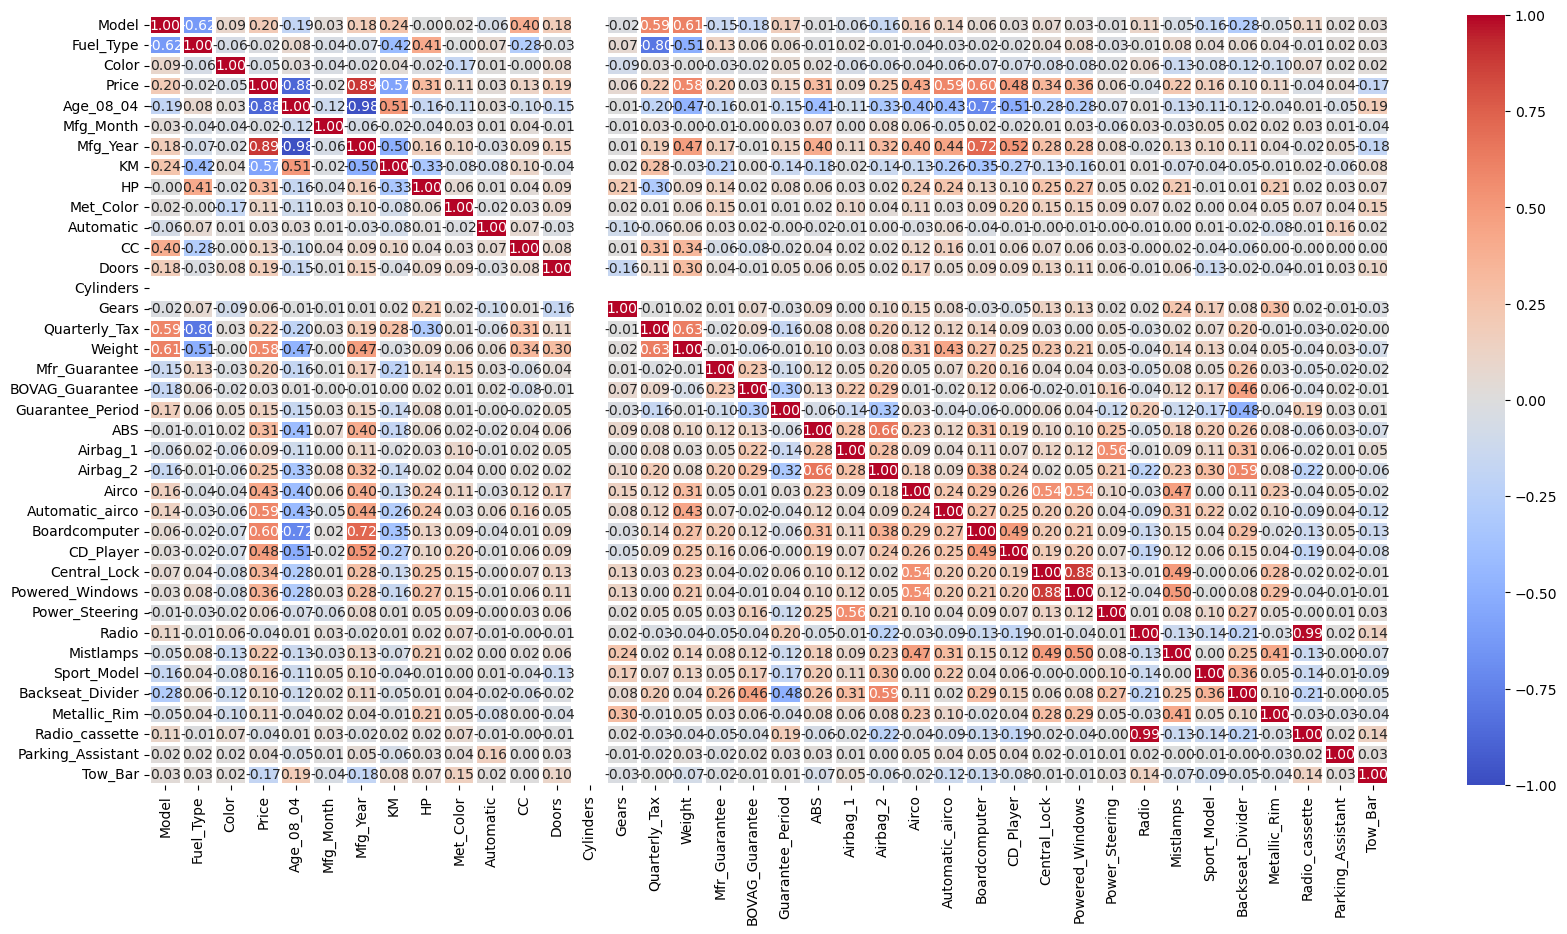

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv('ToyotaCorolla.csv')

# Calculate the correlation matrix
corr = df.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt='.2f', linewidths=1.5, vmax=1, vmin=-1, ax=ax)
plt.show()


# Multi-Collinearity Issues :

 **We can see some variables are highly correlated with each other as follows :** <br>

**1) Price and Age (-0.9) - Strong Negative Correlation**  <br>

**2) Price and Mfg_Year (0.9) - Strong Positive Correlation**  <br>

**3) Age and Mfg_Year (-1.0) - Strong Negative Correlation** <br>

**4)** 
 

# If we set our Correlation Threshold Value, then we might find variables that cause multi-Collinearity.


In [38]:
threshold = 0.9
high_corr_vars = set()

In [39]:
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= threshold:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            high_corr_vars.add((colname1, colname2))

print(high_corr_vars)


{('Radio_cassette', 'Radio'), ('Mfg_Year', 'Age_08_04')}


# Dropping Variables :

**1) Yes , we can drop on of the variables that are highly correlated to each other by setting a threshold value, but this can lead to loss of  important information and affect accuracy model.**<br>
**2) Principal Component Analysis Method : Which transforms original dataset into set of few features (Principal Components) that hold the relevant information.**<br>
**3) Regression Techniques like Lasso Regression by adding penalty term to prevent overfitting reduces the issues of Multi-Collinearity.**<br>

# Question 3:

# Average values of Price and KM :

In [40]:
average_price = df['Price'].mean()
print(average_price,"Euros")

10730.824512534818 Euros


In [41]:
average_km = df["KM"].mean()
print(average_km,"KMs")

68533.25974930362 KMs


# Variance of Price and KM :

In [42]:
Variance_Price = df['Price'].var()
print(Variance_Price,"[^2","Euros]")

13154872.10019311 [^2 Euros]


In [43]:
Variance_KM = df["KM"].var()
print(Variance_KM,"[^2","KMs]")

1406733707.0021696 [^2 KMs]


In [44]:
matrix = df[["Price","KM"]].cov()
print(matrix)

              Price            KM
Price  1.315487e+07 -7.753428e+07
KM    -7.753428e+07  1.406734e+09


Text(0.5, 1.0, 'Scatter Plot of Price versus KM with Mean Lines')

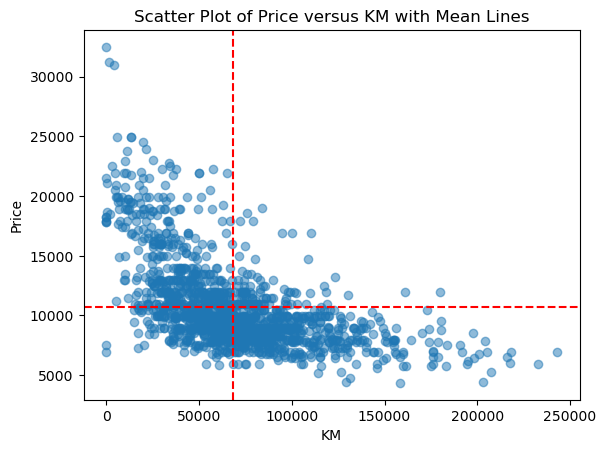

In [45]:
fig, ax = plt.subplots()
ax.scatter(df["KM"], df['Price'], alpha=0.5)
ax.axhline(average_price, color='red', linestyle='--')
ax.axvline(average_km, color='red', linestyle='--')
ax.set_xlabel('KM')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot of Price versus KM with Mean Lines')

# Proportion of Total Variance :

In [46]:
Total_Variance = Variance_Price + Variance_KM
Proportion_Variance_Price = Variance_Price/Total_Variance
print(Proportion_Variance_Price)

0.009264721397019384


# Proportion of total variance  for  Price is 0.92%

In [47]:
Proportion_Variance_KM = Variance_KM/Total_Variance
print(Proportion_Variance_KM)

0.9907352786029807


# Proportion of total variance  for KMs is 99.07%

# Dropping Variables for Dimension Reduction :

**1) Yes, we can drop one of the variables for the sake of dimension reduction, but it's important to consider which variable to drop and how it may affect your analysis.** <br>

**2) It's better to compare the results of your analysis with and without the dropped variable to ensure that the variable is indeed not contributing significantly to your analysis.** <br>

# Question 4 :

# Correlation b/w Price & KMs :

In [48]:
correlation_Price_KM = df["Price"].corr(df["KM"])
print(correlation_Price_KM)

-0.5699601645337193


In [49]:
correlation_KM_Price = df["KM"].corr(df["Price"])
print(correlation_KM_Price)

-0.5699601645337193


**56.9% of the times these two variables (Price & KM) tells the same information, which means theses variables have an  overalapping Information**

**Variation of Price which has information in Price is duplicated by information present in KM (Mileage).**

**The negative value of the correlation indicates an inverse relationship between "Price" and "KM" , which tells that as the mileage of a car increases, the price tends to decrease.**

**Yes, correlation information can be used to reduce the number of variables while making maximum use of their unique contributions to the overall variation by using Principal Component Analysis (PCA).**

# Question 5 :

# Principal Component Analysis :

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Model              1436 non-null   int64
 1   Fuel_Type          1436 non-null   int64
 2   Color              1436 non-null   int64
 3   Price              1436 non-null   int64
 4   Age_08_04          1436 non-null   int64
 5   Mfg_Month          1436 non-null   int64
 6   Mfg_Year           1436 non-null   int64
 7   KM                 1436 non-null   int64
 8   HP                 1436 non-null   int64
 9   Met_Color          1436 non-null   int64
 10  Automatic          1436 non-null   int64
 11  CC                 1436 non-null   int64
 12  Doors              1436 non-null   int64
 13  Cylinders          1436 non-null   int64
 14  Gears              1436 non-null   int64
 15  Quarterly_Tax      1436 non-null   int64
 16  Weight             1436 non-null   int64
 17  Mfr_Guarantee 

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Model'] = le.fit_transform(df['Model'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Color'] = le.fit_transform(df['Color'])

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)
explained_variance_ratio = pca.explained_variance_ratio_ * 100
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1} explains {ratio:.2f}% of the variance")

PC1 explains 21.29% of the variance
PC2 explains 12.58% of the variance
PC3 explains 7.79% of the variance
PC4 explains 7.00% of the variance
PC5 explains 5.88% of the variance
PC6 explains 5.24% of the variance
PC7 explains 4.87% of the variance
PC8 explains 4.10% of the variance
PC9 explains 3.48% of the variance
PC10 explains 3.44% of the variance
PC11 explains 3.10% of the variance
PC12 explains 2.51% of the variance
PC13 explains 2.50% of the variance
PC14 explains 2.29% of the variance
PC15 explains 2.12% of the variance
PC16 explains 2.06% of the variance
PC17 explains 1.61% of the variance
PC18 explains 1.33% of the variance
PC19 explains 1.09% of the variance
PC20 explains 1.04% of the variance
PC21 explains 0.83% of the variance
PC22 explains 0.76% of the variance
PC23 explains 0.74% of the variance
PC24 explains 0.63% of the variance
PC25 explains 0.52% of the variance
PC26 explains 0.27% of the variance
PC27 explains 0.25% of the variance
PC28 explains 0.18% of the variance

# Weights of each Principal Component ( Z1,Z2,.......Z38 ) :

In [55]:
pca.components_

array([[ 3.44364637e-03,  7.63627829e-03, -2.69027715e-02, ...,
        -7.86764652e-02,  1.82232380e-03, -5.97780473e-02],
       [ 8.58543170e-02, -4.81717426e-03,  8.58463702e-03, ...,
         1.67781774e-01,  1.38774546e-04,  1.15494824e-01],
       [-1.29523546e-01,  3.86868088e-02, -1.85010119e-02, ...,
        -2.41766157e-01, -5.91622677e-03, -1.20182312e-01],
       ...,
       [-3.39932700e-02, -1.03218319e-02,  4.51726420e-03, ...,
         6.65510771e-03,  1.34989866e-02,  1.21430508e-03],
       [ 4.78181311e-15,  1.86308661e-16, -4.73085698e-16, ...,
         6.38378239e-15, -4.71844785e-16,  3.60822483e-16],
       [-0.00000000e+00, -6.44931885e-17,  5.88137510e-17, ...,
         2.98426648e-17, -8.13625968e-17, -8.96635197e-17]])

# Principal Components  Variation in the original data :

In [56]:
explained_variance_ratio_1 = pca.explained_variance_ratio_ 
cumulative_variance_ratio = np.cumsum(explained_variance_ratio_1)
components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(components)

12


**Total of 16 Principal Componenents explain 90% variance of the total data**

# Dimension Reduction :

**PCA allows us to transform the original data into a new set of variables (principal components) that capture the maximum amount of variation in the data, while also reducing the number of variables needed to explain the variation.**

# Dealing with Multicollinearity :

**This can help by removing the collinear relationships between the original variables, as the principal components are orthogonal to each other.The new principal components can be used as predictors in place of the original variables, and can help improve model performance by reducing the noise in the data.Using fewer variables can help prevent overfitting, which can also improve model performance.**

# Normalisation :

 **Yes.We need to normalize the data , as our features are not on different scale.It ensures that data is normalised such that each variable has zero mean and unit variance.** 

# Question 6:

# Selecting 50 Observations randomly from the dataset :

In [29]:
sample_50 = df.sample(n=50, random_state=42)
X = sample_50.iloc[:, 1:].values


# Scaling the sample data :

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_sample_50 = scaler.fit_transform(X)

# Visualising the first two Principal Components :

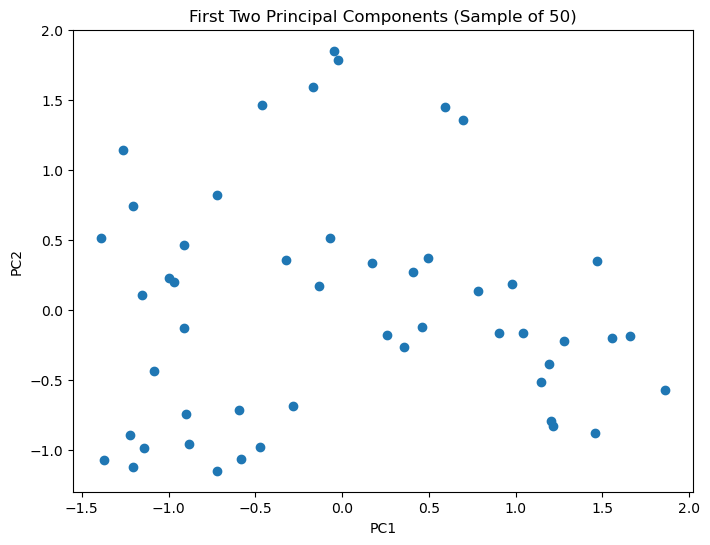

In [31]:
#Creating 50 sample
pca_1 = PCA()
X_pca = pca_1.fit_transform(scaled_sample_50)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First Two Principal Components (Sample of 50)")
plt.show()